[*Business Data Science: Combining Machine Learning and Economics to Optimize, Automate, and Accelerate Business*](https://www.amazon.com/Business-Data-Science-Combining-Accelerate/dp/1260452778/ref=sr_1_3?dchild=1&keywords=Business+Data+Science&qid=1618600384&sr=8-3) by Matt Taddy

Author's code [is here](https://github.com/TaddyLab/bds). My notes [are here](https://github.com/mkudija/mkudija.github.io/blob/master/reading/notes/2021-04-16-Business%20Data%20Science.md).


# Introduction
## R Basics
Page 9-15

I had some issues getting R to work with jupyter notebook where it was not able to launch the kernel, fixed with these steps:

Running `R` in the command line did not open R. Running `which R` pointed to an Anaconda path rather than `/usr/local/bin/R`.

To fix this I edited `~/.bash\_profile`:
- `nano ~/.bash\_profile`
- add `export PATH=/usr/local/bin:$PATH` at bottom
- `ctrl+O`, `return`, `ctrl+X` so save and exit

I could now run R from the command line but the jupyter path was still an issue and was fixed by editing `/Users/matthewkudija/anaconda3/share/jupyter/kernels/ir/kernel.json`
- `nano /Users/matthewkudija/anaconda3/share/jupyter/kernels/ir/kernel.json`
- change `{"argv": \["R", "--slave"...` to `{"argv": \["/usr/local/bin/R", "--slave"...`

After this change I was able to run R in jupyter notebook demonstrated by the next cell.

In [1]:
A <- 2
B <- 4
A*B

[1] 8

Yay! R works in jupyter

We'll load the `pickup.csv` file from his GitHub repo:

In [2]:
trucks <- read.csv("https://raw.githubusercontent.com/TaddyLab/MBAcourse/master/examples/pickup.csv")
head(trucks)

,year,miles,price,make
,<int>,<int>,<int>,<chr>
1,2008,17638,14995,GMC
2,2003,174000,8500,Dodge
3,2001,1500,9998,Dodge
4,2007,22422,23950,GMC
5,2007,34815,19980,GMC
6,1997,167000,5000,GMC


...and save it as a csv locally as well for reproducibility:

In [3]:
write.csv(trucks,"pickup.csv", row.names = FALSE)

In [4]:
trucks[1,]

,year,miles,price,make
,<int>,<int>,<int>,<chr>
1,2008,17638,14995,GMC


In [5]:
trucks[1:3,1]

[1] 2008 2003 2001

In [6]:
trucks[1:3,'year']

[1] 2008 2003 2001

In [7]:
nrow(trucks)

[1] 46

In [8]:
summary(trucks)

      year          miles            price           make          
 Min.   :1978   Min.   :  1500   Min.   : 1200   Length:46         
 1st Qu.:1996   1st Qu.: 70958   1st Qu.: 4099   Class :character  
 Median :2000   Median : 96800   Median : 5625   Mode  :character  
 Mean   :1999   Mean   :101233   Mean   : 7910                     
 3rd Qu.:2003   3rd Qu.:130375   3rd Qu.: 9725                     
 Max.   :2008   Max.   :215000   Max.   :23950                     

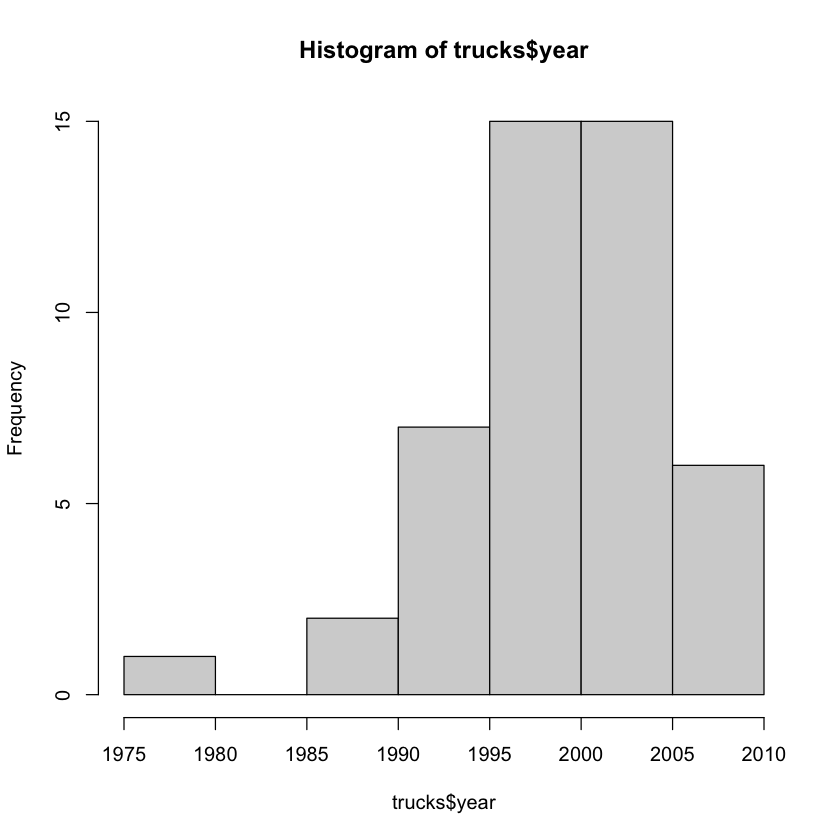

In [9]:
hist(trucks$year)

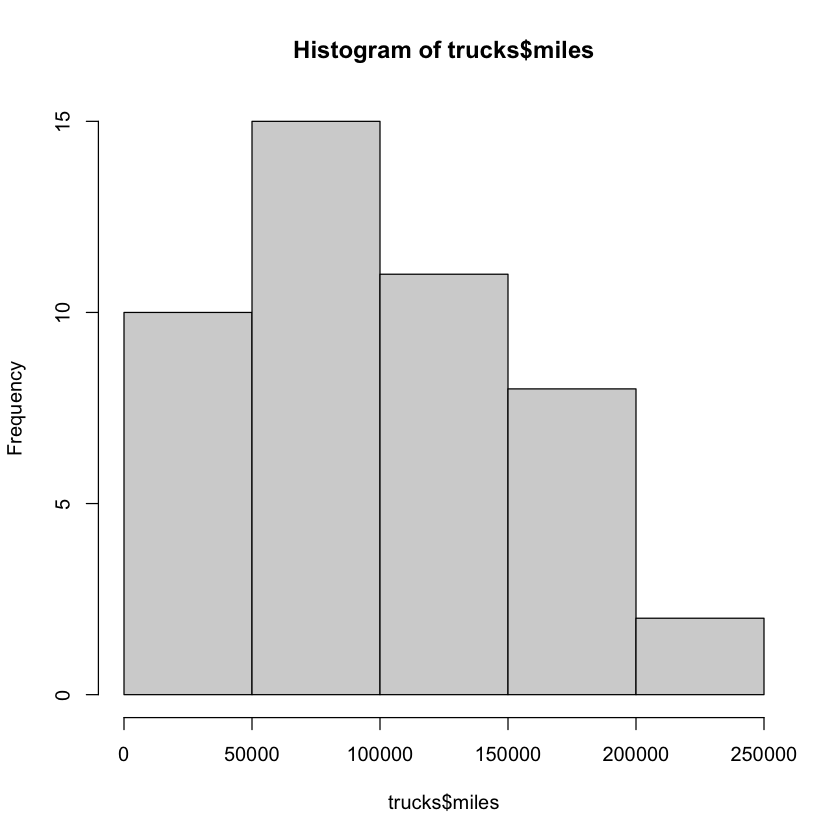

In [10]:
hist(trucks$miles)

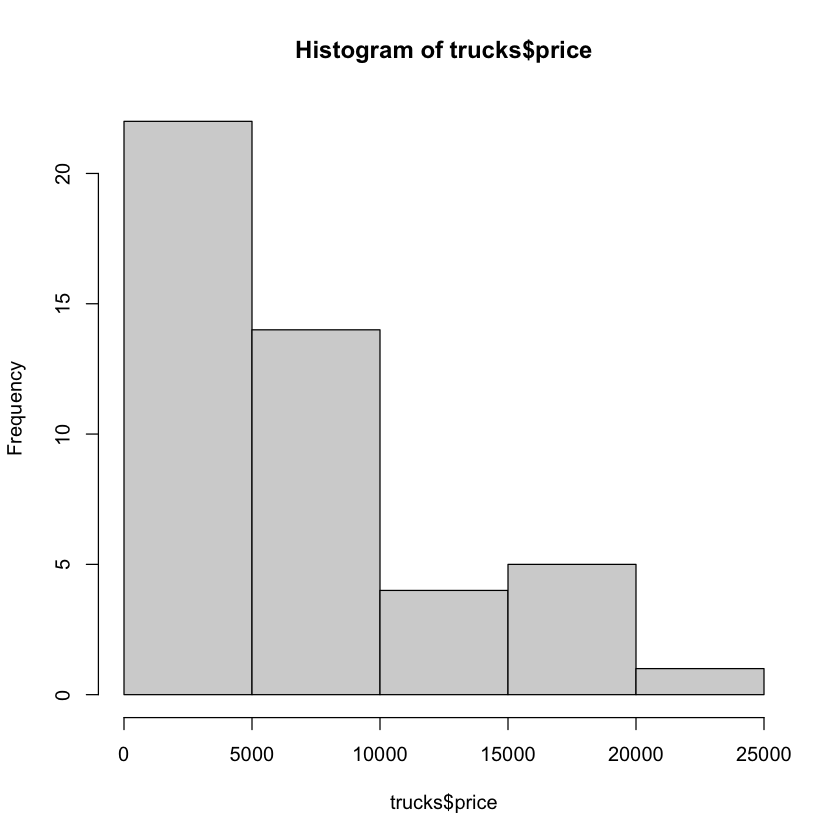

In [11]:
hist(trucks$price)

Wow, plotting is super easy! 

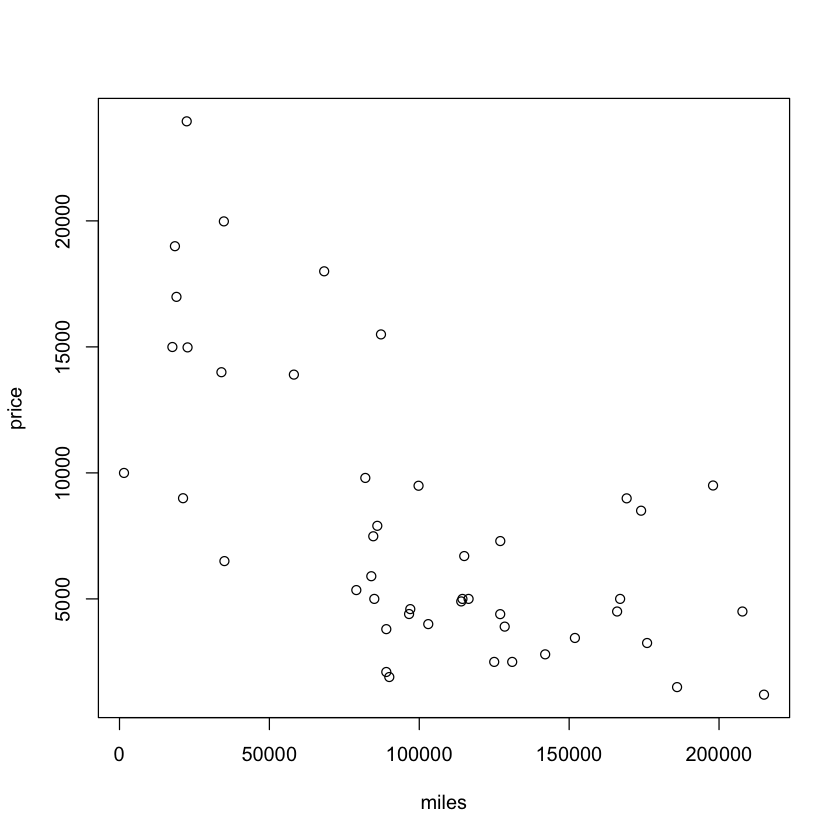

In [12]:
plot(price~miles, data=trucks)

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


ERROR: Error in plot.window(...): need finite 'xlim' values


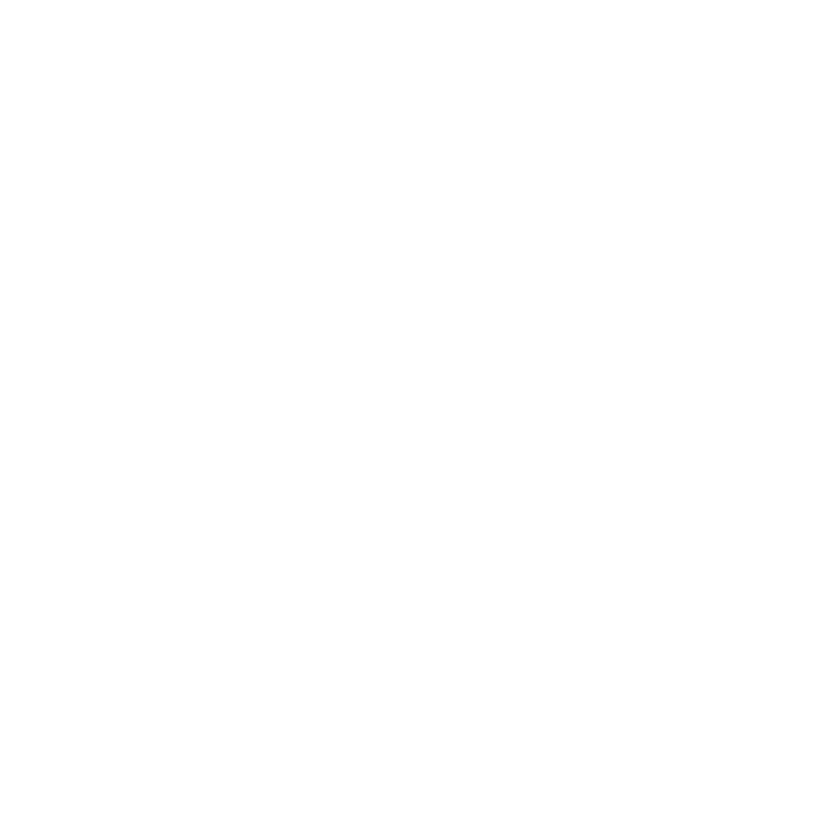

In [13]:
plot(price~make, data=trucks)

Google says this issue is because of the datatype of the `make` columns, so converting it let's us plot.

In [14]:
trucks$make = as.factor(trucks$make)
head(trucks)

,year,miles,price,make
,<int>,<int>,<int>,<fct>
1,2008,17638,14995,GMC
2,2003,174000,8500,Dodge
3,2001,1500,9998,Dodge
4,2007,22422,23950,GMC
5,2007,34815,19980,GMC
6,1997,167000,5000,GMC


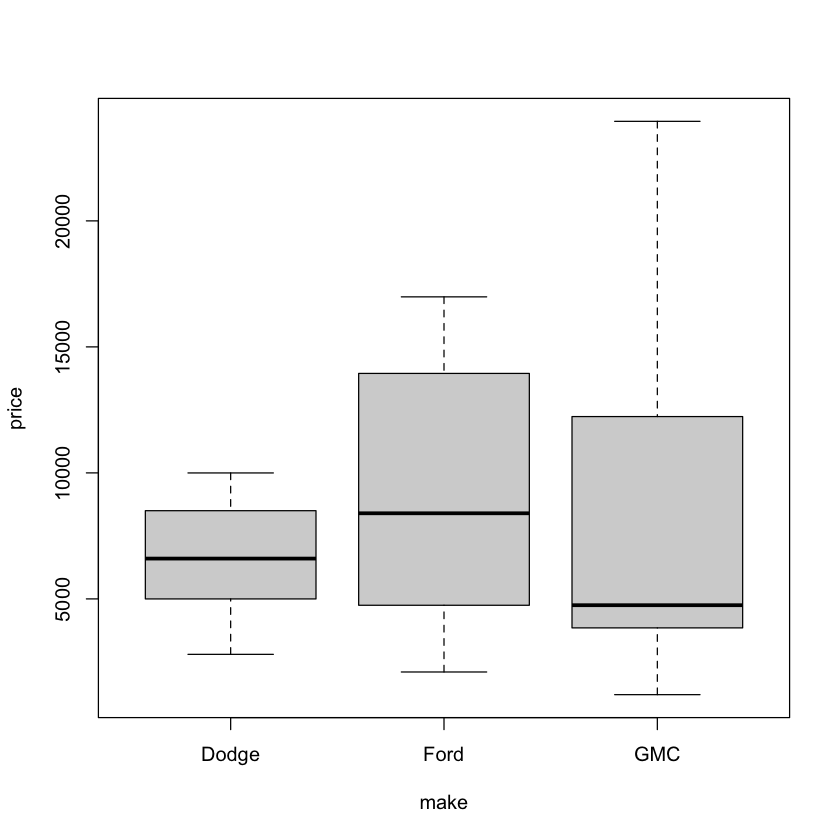

In [15]:
plot(price~make, data=trucks)

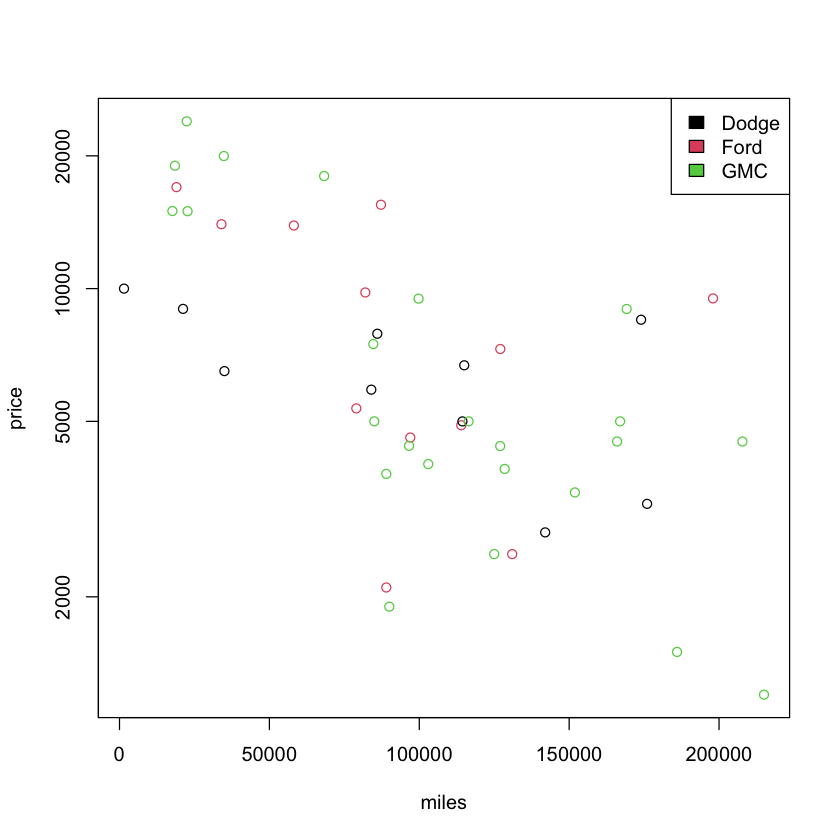

In [16]:
plot(price~miles, data=trucks, log="y", col=trucks$make)
legend("topright", fill=1:3, legend=levels(trucks$make))

Now for the fun part, let's fit a GLM:

In [17]:
# fit <- glm(log(price) ~ make + miles + year, data=trucks)
fit <- glm(price ~ make + miles + year, data=trucks)
summary(fit)


Call:
glm(formula = price ~ make + miles + year, data = trucks)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5923.5  -1648.3   -684.7   1741.5   7666.9  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.163e+06  2.041e+05  -5.696 1.17e-06 ***
makeFord     2.027e+03  1.387e+03   1.461 0.151591    
makeGMC      3.149e+03  1.233e+03   2.553 0.014497 *  
miles       -3.667e-02  1.001e-02  -3.662 0.000708 ***
year         5.862e+02  1.018e+02   5.758 9.55e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 10491010)

    Null deviance: 1403225135  on 45  degrees of freedom
Residual deviance:  430131407  on 41  degrees of freedom
AIC: 880.89

Number of Fisher Scoring iterations: 2


I'm impressed with how straightforward that is, no libraries required (granted R is *statistical* software so I suppose that is to be expected). 

Now not in his book, but let's make a prediction using that GLM:

In [18]:
fit


Call:  glm(formula = price ~ make + miles + year, data = trucks)

Coefficients:
(Intercept)     makeFord      makeGMC        miles         year  
 -1.163e+06    2.027e+03    3.149e+03   -3.667e-02    5.862e+02  

Degrees of Freedom: 45 Total (i.e. Null);  41 Residual
Null Deviance:	    1.403e+09 
Residual Deviance: 430100000 	AIC: 880.9

In [19]:
#define new observation
newdata = data.frame(make = "Dodge",
                     miles = 100000,
                     year = 2015
                    )

#use model to predict
p = predict(fit, newdata, type="response")
cat("Predited price is: $", round(p))

Predited price is: $ 14985

Now let's wrap this in a function:

In [20]:
# Create a function to print squares of numbers in sequence.
price.function <- function(trucks, make, miles, year) {
    # fit glm
    fit <- glm(price ~ make + miles + year, data=trucks)
    
    # define new observation
    newdata = data.frame(make, miles, year)

    #use model to predict
    p = predict(fit, newdata, type="response")
    cat("Predited price is: $", round(p))
}

In [21]:
price.function(trucks, make = "Dodge", miles = 100000, year = 2015)

Predited price is: $ 14985

In [22]:
price.function(trucks, make = "GMC", miles = 15000, year = 2019)

Predited price is: $ 23596